In [3]:
import glob
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
def load_dataset(validation=False):
    if (validation):
        filelist_1 = glob.glob('test/1/*.jpg')
        x_test_1 = np.array([np.array(Image.open(fname)) for fname in filelist_1])
        y_test_1 = np.ones((500,1))
        flatten = x_test_1.shape[1]*x_test_1.shape[2]
        x_test_1 = x_test_1.reshape(x_test_1.shape[0], flatten)
        filelist_0 = glob.glob('test/0/*.jpg')
        x_test_0 = np.array([np.array(Image.open(fname)) for fname in filelist_0])
        y_test_0 = np.ones((500,1))
        flatten = x_test_0.shape[1]*x_test_0.shape[2]
        x_test_0 = x_test_0.reshape(x_test_0.shape[0], flatten)
        x_test = np.concatenate((x_test_0,x_test_1))
        y_test = np.concatenate((y_test_0,y_test_1))
        return x_test,y_test
    else:
        filelist_1 = glob.glob('train/1/*.jpg')
        x_train_1 = np.array([np.array(Image.open(fname)) for fname in filelist_1])
        y_train_1 = np.ones((500,1))
        flatten = x_train_1.shape[1]*x_train_1.shape[2]
        x_train_1 = x_train_1.reshape(x_train_1.shape[0], flatten)
        filelist_0 = glob.glob('train/0/*.jpg')
        x_train_0 = np.array([np.array(Image.open(fname)) for fname in filelist_0])
        y_train_0 = np.zeros((500,1))
        flatten = x_train_0.shape[1]*x_train_0.shape[2]
        x_train_0 = x_train_0.reshape(x_train_0.shape[0], flatten)
        x_train = np.concatenate((x_train_0,x_train_1))
        y_train = np.concatenate((y_train_0,y_train_1))
        return x_train, y_train

In [6]:
def normalize_data(X):
    sc = StandardScaler()
    return sc.fit_transform(X)

In [4]:
def sigmoid(x,derivative=False):
    if(derivative):
        return x*(1-x)
    return 1./(1+np.exp(-x))

In [5]:
def init_weights(n_x,n_h,n_y):
    
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros(shape=(n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros(shape=(n_y, 1))
    return W1, W2, b1, b2

In [6]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),(1-Y))
    cost = -(1.0/m) * np.sum(logprobs)
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    
    return cost

In [7]:
def compute_grad(X,A2,A1,Y,W1,W2):
    m = Y.shape[1]
    l2_error = A2-Y
    dW2 = (1.0/m) * np.dot(l2_error,A1.T)
    db2 = (1.0/m) * np.sum(l2_error, axis=1, keepdims=True)
    l1_error = np.multiply(np.dot(W2.T, l2_error), (A1*(1-A1)))
    #l1_error = np.multiply(np.dot(W2.T, l2_error),1 - np.power(A1, 2))
    dW1 = (1.0/m) * np.dot(l1_error, X.T)
    db1 = (1.0/m) * np.sum(l1_error, axis=1, keepdims=True)
    
    return dW1,dW2,db1,db2

In [8]:
def update_parameters(W1,W2,b1,b2,dW1,dW2,db1,db2,lr):
    W1 -= lr*dW1
    W2 -= lr*dW2
    b1 -= lr*db1
    b2 -= lr*db2
    return W1,W2,b1,b2

In [9]:
def main(X,y,no_of_iter=1000):
    n_x = X.shape[0] #784
    n_h = 2 #number of nodes in hidden layer
    n_y = 1 #number of nodes in output layer
    lr = 0.2
    W1, W2, b1, b2 = init_weights(n_x,n_h,n_y)
    l_cost = []
    
    
    for i in range(no_of_iter):
        A0 = X
        A1 = sigmoid(np.dot(W1,A0)+b1)
        A2 = sigmoid(np.dot(W2,A1)+b2)
        cost_ = compute_cost(A2,y)
        l_cost.append(cost_)
        
        if (i%1000 is 0):
            print ("cost is {}".format(cost_))
        
        dW1,dW2,db1,db2 = compute_grad(X,A2,A1,y,W1,W2)
        W1,W2,b1,b2 = update_parameters(W1,W2,b1,b2,dW1,dW2,db1,db2,lr)

    return W1, W2, b1, b2,l_cost   

In [10]:
def validation(W1,W2,b1,b2,X):
    A0 = X
    A1 = sigmoid(np.dot(W1,A0)+b1)
    #A1 = np.tanh(np.dot(W1,A0)+b1)
    A2 = sigmoid(np.dot(W2,A1)+b2)
    y_hat = np.round(A2)
    return y_hat

**TRAINING MNIST DATASET**

In [7]:
X, y = load_dataset()
X = normalize_data(X).T
y = y.T

/home/stan/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


cost is 0.6931120018062136
cost is 0.01127938240103691
cost is 0.005355361824878315
cost is 0.0035038489938892187
cost is 0.002601978955351762
cost is 0.0020687319480381934
cost is 0.0017166004268970468
cost is 0.0014667641962996742
cost is 0.0012803277898372838
cost is 0.0011358893088321464


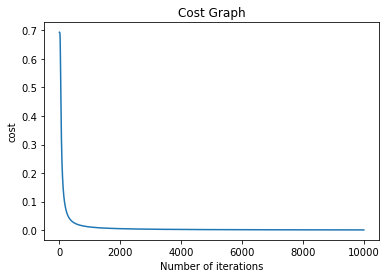

In [18]:
final_W1, final_W2, final_b1, final_b2 ,l_cost= main(X,y,10000)
plt.title("Cost Graph")
plt.xlabel("Number of iterations")
plt.ylabel("cost")
plt.plot(l_cost)
plt.show()

**VALIADTION OF MNIST**

In [19]:
x_test, y_test = load_dataset(validation=True)
x_test = normalize_data(x_test).T
y_test = y_test.T
predictions = validation(final_W1, final_W2, final_b1, final_b2 ,x_test)
acc = np.mean(y_test==predictions)
print ("Accuracy is {}%".format(acc*100))

Accuracy is 49.6%


/home/stan/anaconda2/envs/tensorflow/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Cross validation of accuracy with sklearn MLP Classifier library**

In [27]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='logistic',solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(2,), random_state=1)

In [28]:
clf.fit(X.T,y.T)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [29]:
x_test, y_test = load_dataset(validation=True)
x_test = normalize_data(x_test)
x_test = x_test.T
y_test = y_test.T

In [30]:
prediction = (clf.predict(x_test.T).reshape(1000,1).T)
acc = np.mean(prediction==y_test)
print (acc)

0.49
